# Dimensionality Reduction Techniques


## Imports and Data Loading

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, parser='auto')

## Data Preprocessing

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Principal Component Analysis (PCA)

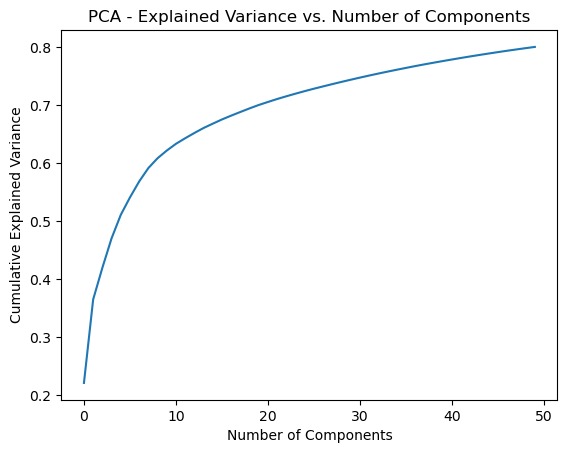

In [22]:
# Apply PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs. Number of Components')
plt.show()

## Linear Discriminant Analysis (LDA)

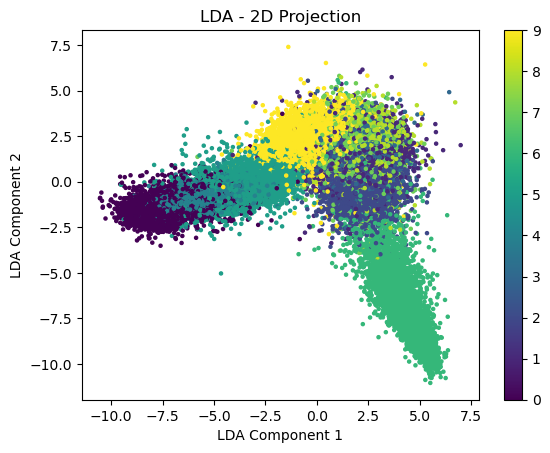

In [28]:
# Convert categorical y to numeric
if y.dtype.name == 'category':
    y_numeric = pd.factorize(y)[0]
else:
    y_numeric = y

# Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_numeric)

# Plot the LDA result
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_numeric, cmap='viridis', s=5)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA - 2D Projection')
plt.colorbar()
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

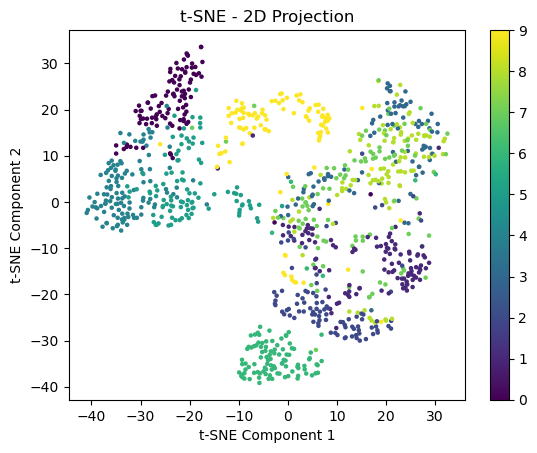

In [32]:
# Convert categorical y to numeric for visualization
if y.dtype.name == 'category':
    y_numeric = pd.factorize(y)[0]
else:
    y_numeric = y

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled[:1000])  # Limiting to 1000 samples for visualization

# Plot the t-SNE result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_numeric[:1000], cmap='viridis', s=5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE - 2D Projection')
plt.colorbar()
plt.show()

## Independent Component Analysis (ICA)

C:\Users\areeb\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


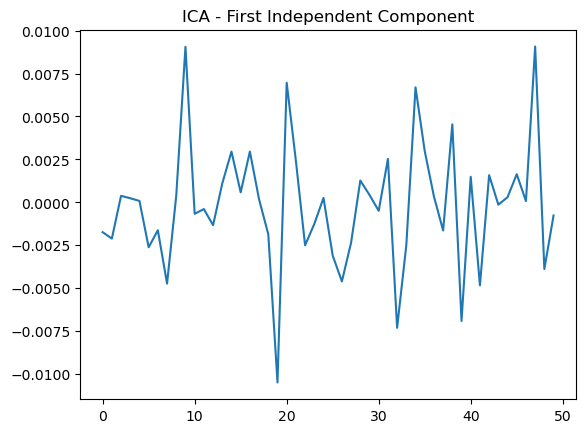

In [35]:
# Apply ICA
ica = FastICA(n_components=50, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Plot some independent components
plt.plot(X_ica[0])
plt.title('ICA - First Independent Component')
plt.show()

## Feature Selection (SelectKBest and RFE)

In [16]:
import pandas as pd
from sklearn.datasets import load_iris  # Example dataset
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier

# Example: Loading the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)  # Adjust 'k' as needed
X_kbest = selector.fit_transform(X_scaled, y)

# Apply Recursive Feature Elimination (RFE)
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=2)  # Adjust 'n_features_to_select' as needed
X_rfe = rfe.fit_transform(X_scaled, y)

## Model Evaluation

In [14]:
# Train a simple model on the reduced datasets
model = RandomForestClassifier()

# Evaluate on PCA data
model.fit(X_pca, y)
y_pred_pca = model.predict(X_pca)
print("PCA Accuracy:", accuracy_score(y, y_pred_pca))

# Evaluate on LDA data
model.fit(X_lda, y)
y_pred_lda = model.predict(X_lda)
print("LDA Accuracy:", accuracy_score(y, y_pred_lda))

# Evaluate on SelectKBest data
model.fit(X_kbest, y)
y_pred_kbest = model.predict(X_kbest)
print("SelectKBest Accuracy:", accuracy_score(y, y_pred_kbest))

# Evaluate on RFE data
model.fit(X_rfe, y)
y_pred_rfe = model.predict(X_rfe)
print("RFE Accuracy:", accuracy_score(y, y_pred_rfe))

NameError: name 'RandomForestClassifier' is not defined